In [22]:
import yfinance as yf
import pandas as pd

# Fetch live data for Apple stock
import yfinance as yf
from datetime import datetime, timedelta

# Define the date range (last 4 months)
end_date = datetime.now()
start_date = end_date - timedelta(days=4*30)  # Approximate 4 months

# Fetch daily data for Apple stock
symbol = 'AAPL'
stock_data = yf.download(symbol, start=start_date, end=end_date, interval='1h')
# Calculate pivot points
pivot_point = (stock_data['High'] + stock_data['Low'] + stock_data['Close']) / 3

# Calculate support and resistance levels
first_support = (2 * pivot_point) - stock_data['High']
first_resistance = (2 * pivot_point) - stock_data['Low']
second_support = pivot_point - (stock_data['High'] - stock_data['Low'])
second_resistance = pivot_point + (stock_data['High'] - stock_data['Low'])
third_support = pivot_point - 2 * (stock_data['High'] - stock_data['Low'])
third_resistance = pivot_point + 2 * (stock_data['High'] - stock_data['Low'])

# Create a new DataFrame to store the pivot points and support/resistance levels
pivot_df = pd.DataFrame(index=stock_data.index)
pivot_df['Pivot'] = pivot_point
pivot_df['Support 1'] = first_support
pivot_df['Resistance 1'] = first_resistance
pivot_df['Support 2'] = second_support
pivot_df['Resistance 2'] = second_resistance
pivot_df['Support 3'] = third_support
pivot_df['Resistance 3'] = third_resistance

# Merge the pivot DataFrame with the stock data DataFrame
stock_data_with_pivot = pd.concat([stock_data, pivot_df], axis=1)

# Create signals based on pivot points
stock_data_with_pivot['Signal'] = 0
stock_data_with_pivot.loc[stock_data_with_pivot['Low'] < stock_data_with_pivot['Support 1'], 'Signal'] = 1
stock_data_with_pivot.loc[stock_data_with_pivot['Low'] < stock_data_with_pivot['Support 2'], 'Signal'] = 2
stock_data_with_pivot.loc[stock_data_with_pivot['Low'] < stock_data_with_pivot['Support 3'], 'Signal'] = 3
stock_data_with_pivot.loc[stock_data_with_pivot['High'] > stock_data_with_pivot['Resistance 1'], 'Signal'] = -1
stock_data_with_pivot.loc[stock_data_with_pivot['High'] > stock_data_with_pivot['Resistance 2'], 'Signal'] = -2
stock_data_with_pivot.loc[stock_data_with_pivot['High'] > stock_data_with_pivot['Resistance 3'], 'Signal'] = -3
stock_data_with_pivot['actual_returns'] = stock_data_with_pivot['Close'].pct_change()
stock_data_with_pivot['algo returns'] =  (
    stock_data_with_pivot["actual_returns"] * stock_data_with_pivot["Signal"]
)
# Print the updated DataFrame
print(stock_data_with_pivot)


[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close   
Datetime                                                                    
2023-03-09 09:30:00-05:00  153.559006  154.535004  152.948807  153.985306  \
2023-03-09 10:30:00-05:00  154.000000  154.509995  153.699997  154.095001   
2023-03-09 11:30:00-05:00  154.100006  154.451294  153.568893  154.130203   
2023-03-09 12:30:00-05:00  154.139999  154.195007  152.520004  152.647400   
2023-03-09 13:30:00-05:00  152.639999  152.639999  151.509995  151.629105   
...                               ...         ...         ...         ...   
2023-07-06 11:30:00-04:00  190.160095  191.009995  190.160004  190.934998   
2023-07-06 12:30:00-04:00  190.934998  191.229996  190.880005  191.110001   
2023-07-06 13:30:00-04:00  191.109894  191.440002  190.740005  191.029999   
2023-07-06 14:30:00-04:00  191.020004  191.684998  190.990005  191.639999   
2023-07

In [23]:
import numpy as np

# Set the initial capital
initial_capital = 10000.0

# Create a DataFrame `positions`
positions = pd.DataFrame(index=stock_data_with_pivot.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 50*stock_data_with_pivot['Signal']  

# Initialize the portfolio with value owned   
portfolio = positions.multiply(stock_data_with_pivot['Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(stock_data_with_pivot['Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(stock_data_with_pivot['Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.tail(20))


                                  AAPL     holdings          cash   
Datetime                                                            
2023-06-30 13:30:00-04:00  9651.249695  9651.249695   8577.632904  \
2023-06-30 14:30:00-04:00  9674.500275  9674.500275   8577.632904   
2023-06-30 15:30:00-04:00 -9690.000153 -9690.000153  27957.633209   
2023-07-03 09:30:00-04:00 -9645.749664 -9645.749664  27957.633209   
2023-07-03 10:30:00-04:00  9617.749786  9617.749786   8722.133636   
2023-07-03 11:30:00-04:00 -9605.750275 -9605.750275  27933.634186   
2023-07-05 09:30:00-04:00  9617.500305  9617.500305   8698.633575   
2023-07-05 10:30:00-04:00 -9571.749878 -9571.749878  27842.133331   
2023-07-05 11:30:00-04:00 -9557.080078 -9557.080078  27842.133331   
2023-07-05 12:30:00-04:00 -9549.500275 -9549.500275  27842.133331   
2023-07-05 13:30:00-04:00  9547.499847  9547.499847   8747.133636   
2023-07-05 14:30:00-04:00  9567.749786  9567.749786   8747.133636   
2023-07-05 15:30:00-04:00 -9566.00

[*********************100%***********************]  1 of 1 completed


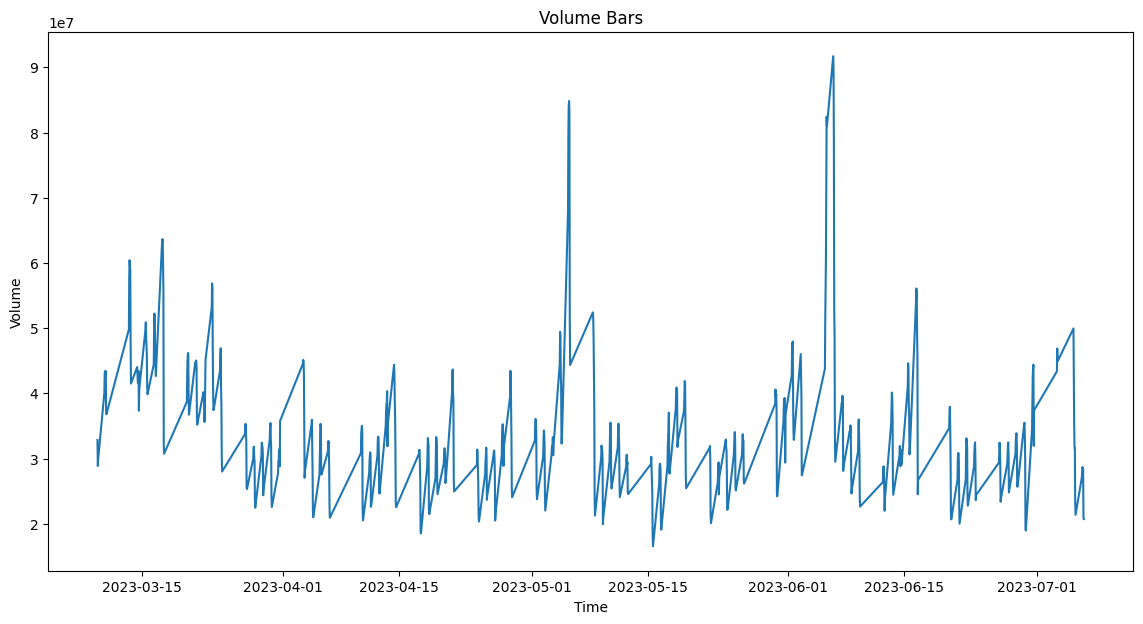

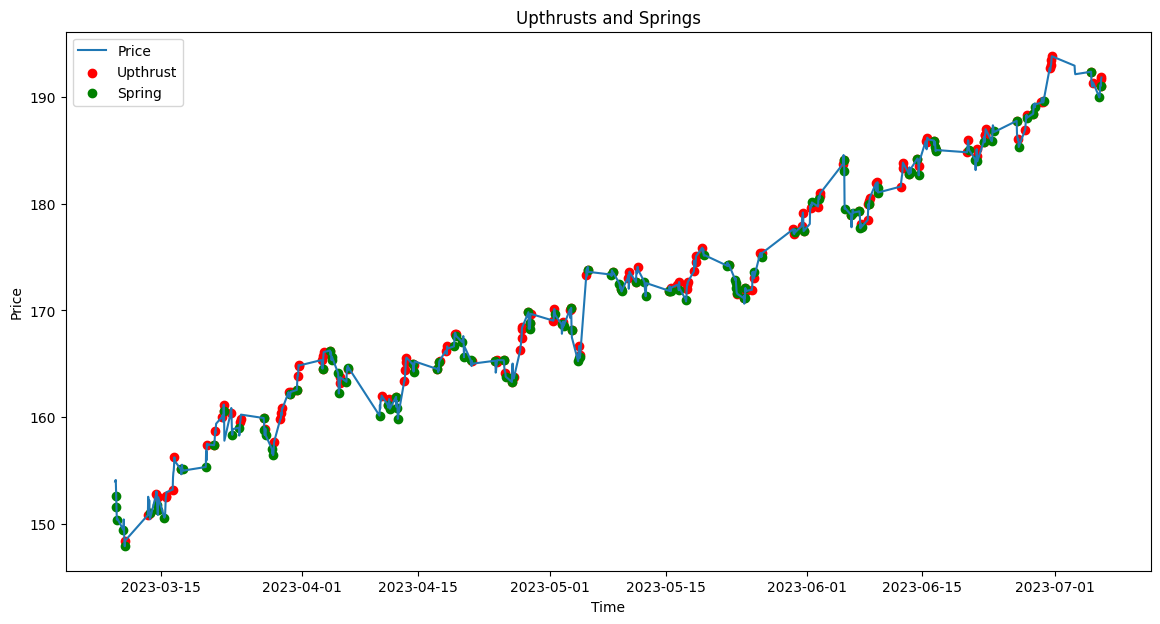

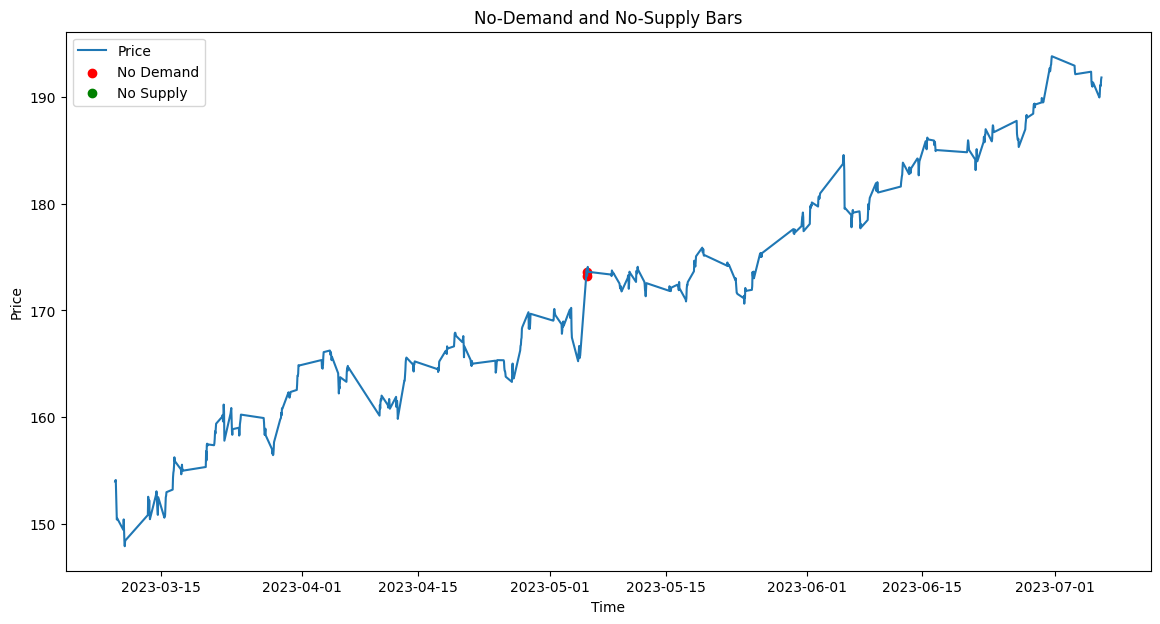

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the date range (last 4 months)
end_date = datetime.now()
start_date = end_date - timedelta(days=4*30)  # Approximate 4 months

# Fetch daily data for Apple stock
symbol = 'AAPL'
stock_data = yf.download(symbol, start=start_date, end=end_date, interval='1h')

# Calculate volume bars
stock_data['volume_bar'] = stock_data['Volume'].rolling(window=5).sum()

# Identify upthrusts and springs
stock_data['upthrust'] = (stock_data['High'] > stock_data['High'].shift(1)) & (stock_data['Volume'] > stock_data['Volume'].shift(1))
stock_data['spring'] = (stock_data['Low'] < stock_data['Low'].shift(1)) & (stock_data['Volume'] > stock_data['Volume'].shift(1))

# Identify no-demand and no-supply bars
stock_data['no_demand'] = (stock_data['High'] - stock_data['Low'] <= 0.1 * (stock_data['High'].rolling(window=5).max() - stock_data['Low'].rolling(window=5).min())) & (stock_data['Volume'] < stock_data['Volume'].rolling(window=5).mean())
stock_data['no_supply'] = (stock_data['High'] - stock_data['Low'] <= 0.1 * (stock_data['High'].rolling(window=5).max() - stock_data['Low'].rolling(window=5).min())) & (stock_data['Volume'] > stock_data['Volume'].rolling(window=5).mean())

# Plot volume bars
plt.figure(figsize=(14, 7))
plt.plot(stock_data['volume_bar'])
plt.title('Volume Bars')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

# Plot upthrusts and springs
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Price')
plt.scatter(stock_data.index[stock_data['upthrust']], stock_data['Close'][stock_data['upthrust']], color='red', label='Upthrust')
plt.scatter(stock_data.index[stock_data['spring']], stock_data['Close'][stock_data['spring']], color='green', label='Spring')
plt.title('Upthrusts and Springs')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot no-demand and no-supply bars
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Price')
plt.scatter(stock_data.index[stock_data['no_demand']], stock_data['Close'][stock_data['no_demand']], color='red', label='No Demand')
plt.scatter(stock_data.index[stock_data['no_supply']], stock_data['Close'][stock_data['no_supply']], color='green', label='No Supply')
plt.title('No-Demand and No-Supply Bars')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
